# 混合拡大2x2ゲームにおける最適反応
## 2025KGSOC数理社会学ノート（6章）
石田淳（aishida@kwansei.ac.jp）

混合戦略と最適反応の定義に従って，混合戦略ナッシュ均衡を理解する．詳細については岡田章，2021『ゲーム理論　第3版』有斐閣，2章を参照．

In [1]:
import numpy as np
import sympy as sy
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

2x2の利得行列をpmatとして定義する．
`numpy`配列で，第1次元がプレイヤー1の利得行列$M_1$，第2次元がプレイヤー2の利得行列$M_2$である．

ここでは例として「マッチングペニー」の利得行列を取り上げる．

In [2]:
# matching penny for example
pmat = np.array([[[-1, 1],[1, -1]],[[1, -1], [-1, 1]]])
# Prisoners Dilemma
# pmat = np.array([[[5, -4],[6, -3]],[[5, 6], [-4, -3]]])
# Coordination game
# pmat = np.array([[[2, 0],[0, 4]],[[2, 0], [0, 4]]])
# Chickin game
# pmat = np.array([[[3, 1],[5, 0]],[[3, 5], [1, 0]]])
print("player 1's matrix M_1:\n", pmat[0, :, :])
print("player 2's matrix M_2:\n", pmat[1, :, :])
#print(pmat.transpose(2,1,0).reshape(4,2))

player 1's matrix M_1:
 [[-1  1]
 [ 1 -1]]
player 2's matrix M_2:
 [[ 1 -1]
 [-1  1]]


同時確率マトリックスを$P$とする.

In [3]:
p, q = sy.symbols("p q")
prob = np.outer(np.array([p, 1-p]),  np.array([q, 1-q]))
print("P =",prob)

P = [[p*q p*(1 - q)]
 [q*(1 - p) (1 - p)*(1 - q)]]


それぞれのプレイヤー$i$の期待利得関数をユニバーサル関数として定義する．
$$F_i(p, q) = \sum M_i P$$

In [4]:
# for player 1
F1 = sy.lambdify((p, q), np.sum(pmat[0, :, :] * prob), "numpy")
# for player 2
F2 = sy.lambdify((p, q), np.sum(pmat[1, :, :] * prob), "numpy")

In [5]:
F1(0.5,0.5)

0.0

2つのリストから直積リストを出力する関数を定義しておく（Rの`expand.grid`）．

In [6]:
# Cardesian product function
def Cardesian(x, y):
    c = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
    return c

In [7]:
Cardesian([0, 1], [0, 1])

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

実現可能集合(feasible set)
\begin{align*}
U=\{(F_1(p,q), F_2(p, q))| (p, q) \in Q\}
\end{align*}
をプロットする．

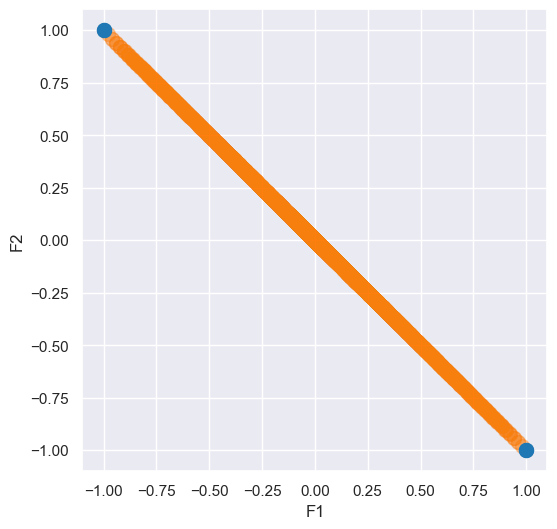

In [8]:
pures = Cardesian([0,1], [0,1])

pp = np.linspace(0, 1, 101)
qq = np.linspace(0, 1, 101)
pp_qq = Cardesian(pp, qq)


plt.figure(figsize=(6, 6))
plt.scatter(F1(pp_qq[:,0], pp_qq[:,1]), F2(pp_qq[:,0], pp_qq[:,1]), s=100, c="tab:orange", alpha=0.1)
plt.scatter(F1(pures[:,0], pures[:,1]), F2(pures[:,0], pures[:,1]), s=100, c="tab:blue", label = "Pure strategy")
plt.xlabel("F1")
plt.ylabel("F2");

最適応答対応(Best response correspondence)

\begin{align*}
    B_1(q)&=\{p\in [0, 1]|F_1(p,q)=\max_{r\in[0,1]}F_1(r,q)\} \\
    B_2(p)&=\{q\in [0, 1]|F_2(p,q)=\max_{r\in[0,1]}F_2(p,r)\}
\end{align*}

In [9]:
acc = 101 # accuracy
# best responce correspodence for player 1
def B1(q):
    pp = np.linspace(0, 1, acc)
    brc = pp[np.isclose(F1(pp, q), np.max(F1(pp, q)))]
    return np.transpose([brc, np.repeat(q, len(brc))])
# for player 2
def B2(p):
    qq = np.linspace(0, 1, acc)
    brc = qq[np.isclose(F2(p, qq), np.max(F2(p, qq)))]
    return np.transpose([np.repeat(p, len(brc)), brc])

最適応答対応の組(Best responce correspodence of the game) $B(p,q)=B_1(q)\times B_2(p)$.

In [10]:
# best responce correspodence
def B(pq):
    x = B1(pq[1])[:,0]
    y = B2(pq[0])[:,1]
    return Cardesian(x, y)

In [11]:
ex = np.array([0, 0])
B(ex)

array([[1., 0.]])

最適応答対応をプロットする．


In [12]:
# best responce correspondence curve for player 1
BestRes1 = np.empty([0, 2])
for q in np.linspace(0, 1, acc):
    BestRes1 = np.append(BestRes1, B1(q), axis=0)
# for player 2
BestRes2 = np.empty([0, 2])
for p in np.linspace(0, 1, acc):
    BestRes2 = np.append(BestRes2, B2(p), axis=0)

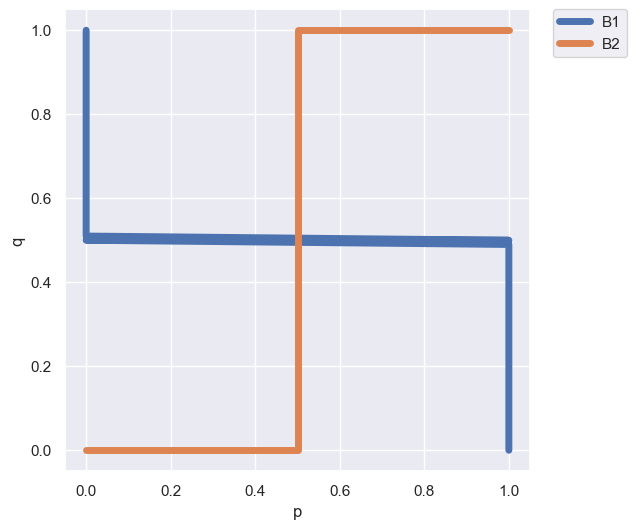

In [13]:
plt.figure(figsize=(6, 6))
plt.plot(BestRes1[:,0], BestRes1[:,1], lw=5, label = "B1", zorder=1)
plt.plot(BestRes2[:,0], BestRes2[:,1], lw=5, label = "B2", zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("p")
plt.ylabel("q");

赤の点$(p,q)$を指定すると，それに対応する最適応答の組を緑のエリアで出力する．

In [14]:
def BestResPlot(p, q):
    point = np.array([p, q]) # (p,q) as the red dot
    BestRes = B(point)       # B(p,q) as the green area
    plt.figure(figsize=(6, 6))
    plt.plot(BestRes1[:,0], BestRes1[:,1], lw=5, label = "B1", zorder=1)
    plt.plot(BestRes2[:,0], BestRes2[:,1], lw=5, label = "B2", zorder=2)
    plt.scatter(point[0], point[1], s=100, c="tab:red", alpha=0.75, zorder=3)
    # plt.arrow(point[0], point[1], np.asscalar(BestRes[0,0]-point[0])*0.9, np.asscalar(BestRes[0,1]-point[1])*0.9, width = 0.01, color="tab:red", alpha=0.75, zorder=3)
    plt.scatter(BestRes[:,0], BestRes[:,1], s=100, c="tab:green", marker=",", alpha=0.75, zorder=4)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlabel("p")
    plt.ylabel("q");

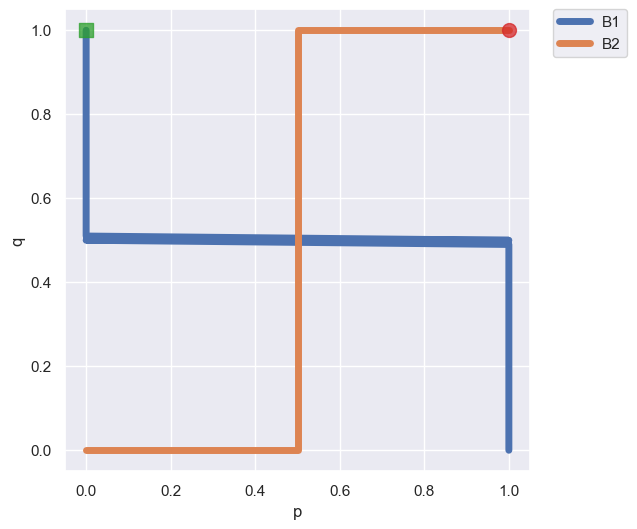

In [15]:
BestResPlot(1, 1)

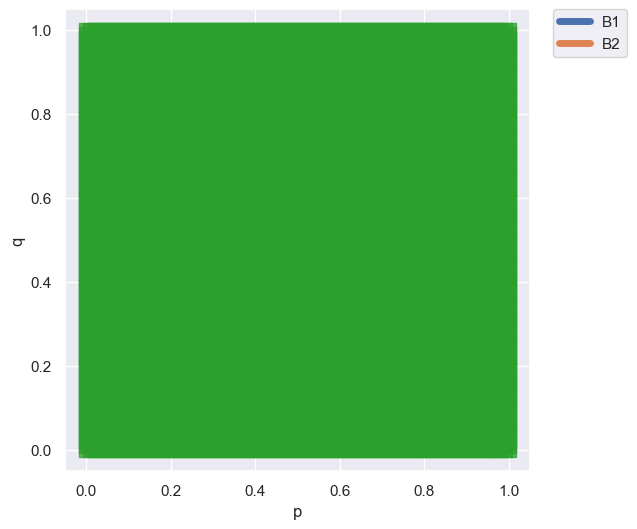

In [16]:
BestResPlot(1/2, 1/2)

別のゲームでも試してみよう！